<a href="https://colab.research.google.com/github/Rishika70/Hack_To_Hire/blob/main/Hack_To_Hire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers[torch] tokenizers datasets evaluate rouge_score sentencepiece huggingface_hub --upgrade

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 995.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl

In [2]:
!pip install bleu

  Preparing metadata (setup.py) ... done
  Created wheel for bleu: filename=bleu-0.3-py3-none-any.whl size=5780 sha256=e631f3f8b5b8dd5d02ad170ef2ba1e092c15f25054139cae1f02452030867434
  Stored in directory: /root/.cache/pip/wheels/c6/d8/d1/009abe01b8b2c6a14c62d197b510b3cc1076014c22d712c5ce
Successfully built bleu


In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertModel
from transformers import T5Tokenizer, T5Model
from transformers import GPT2Tokenizer, GPT2Model
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split


In [4]:
# Tokenize the data
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
!pip install datasets
#Import the datasets library
from datasets import load_dataset


# Load and split the dataset
dataset = load_dataset("toughdata/quora-question-answer-dataset")
dataset = dataset["train"].train_test_split(test_size=0.2)
train_dataset = dataset["train"]
test_dataset = dataset["test"]



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/56402 [00:00<?, ? examples/s]

In [6]:

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'question' and 'answer' columns
dataset = dataset.map(lambda x: {'question': preprocess_text(x['question']),
                                 'answer': preprocess_text(x['answer'])})

# Convert dataset to pandas DataFrame for splitting
df = dataset['train'].to_pandas()

# Split the data into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

print("Training Data:")
print(train_data)
print("\nValidation Data:")
print(val_data)


Map:   0%|          | 0/45121 [00:00<?, ? examples/s]

Map:   0%|          | 0/11281 [00:00<?, ? examples/s]

Training Data:
                                                question  \
17394               download SBI PO old question paper ?   
29099               happen human make mosquito extinct ?   
42067  Brutalism ( architectural style ) unpopular of...   
24706                             Shopify dropshipping ?   
35644  right start preparing Civil Services Exam 26 y...   
...                                                  ...   
11284         strangest holiday gift left shaking head ?   
44732  possible achieve native fluency adult prior ex...   
38158  Surveys : SoGoSurvey vs. SurveyMonkey ? one be...   
860    high protein Indian vegetarian food source ava...   
15795                         take control blood sugar ?   

                                                  answer  
17394  Hi .. ! ! State Bank India conducting SBI PO e...  
29099  Losing key specie bottom food chain would deva...  
42067  started reddit discussion exact topic , 've in...  
24706  Ill show way make mon

In [7]:
# Convert dataset to pandas DataFrame
df = pd.DataFrame(dataset['train'])



In [8]:
# To display the entirety of each row in the Dataset
pd.set_option('display.max_colwidth', None)

In [9]:
# Display first few rows of the dataset
print(df.head())

                                                             question  \
0                               create customized WordPress website ?   
1                                                    mean Canadians ?   
2                                                   proxy , use one ?   
3  evolution true ( clearly ) , would observable evidence look like ?   
4                                  talk like native English speaker ?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape

(45121, 2)

Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45121 entries, 0 to 45120
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  45121 non-null  object
 1   answer    45121 non-null  object
dtypes: object(2)
memory usage: 705.1+ KB


Duplicate Values

In [12]:
# Dataset Duplicate Value Count
df.duplicated().sum()

926

Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df.isna().sum()

question    0
answer      0
dtype: int64

Understanding Your Variables

In [14]:
# Dataset Columns
df.columns

Index(['question', 'answer'], dtype='object')

In [15]:
# Print the available columns in the DataFrame
print(df.columns)

Index(['question', 'answer'], dtype='object')


#Data Wrangling code

Clean the text


In [16]:

import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df['question_cleaned'] = df['question'].apply(clean_text)
df['answer_cleaned'] = df['answer'].apply(clean_text)

print(df[['question_cleaned', 'answer_cleaned']])

                                                                    question_cleaned  \
0                                               create customized wordpress website    
1                                                                    mean canadians    
2                                                                    proxy  use one    
3                     evolution true  clearly   would observable evidence look like    
4                                                  talk like native english speaker    
...                                                                              ...   
45116                                                                   f  x    1  x   
45117                                                  mammogram lead breast cancer    
45118  learn dance  trying  ca nt learn dance  mainly want learn hip hop kpop dance    
45119                                               basketball like threepoint shot    
45120              police office

In [17]:


# Assuming _df_0 is your DataFrame
data = {
    'question': ['?', 'How are you today?', 'Where do you live?', 'What is your name?', 'How are you today?'],
    'answer': ['My name is John.', 'I am fine, thank you.', 'I live in New York.', 'I am called John.', 'I am doing well.']
}

_df_0 = pd.DataFrame(data)

# Group by 'question' and calculate the size of each group
question_distribution = _df_0.groupby('question').size().reset_index(name='count')

# Print the distribution of questions
print("Question Distribution:")
print(question_distribution)

# Group by 'answer' and calculate the size of each group
answer_distribution = _df_0.groupby('answer').size().reset_index(name='count')

# Print the distribution of answers
print("\nAnswer Distribution:")
print(answer_distribution)


Question Distribution:
             question  count
0                   ?      1
1  How are you today?      2
2  What is your name?      1
3  Where do you live?      1

Answer Distribution:
                  answer  count
0      I am called John.      1
1       I am doing well.      1
2  I am fine, thank you.      1
3    I live in New York.      1
4       My name is John.      1


In [18]:
# Printing the organized data
for i, key in enumerate(data, start=1):
    print(f"Entry {i}")
    print(f"Question: {data[key][i-1]}") # Access the list element using an integer index (i-1)
    print(f"Answer: {data[key][i-1]}")   # Access the list element using an integer index (i-1)
    print()

Entry 1
Question: ?
Answer: ?

Entry 2
Question: I am fine, thank you.
Answer: I am fine, thank you.



Tokenization

In [19]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['question_tokens'] = df['question_cleaned'].apply(word_tokenize)
df['answer_tokens'] = df['answer_cleaned'].apply(word_tokenize)

print(df[['question_tokens', 'answer_tokens']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                                                question_tokens  \
0                                                      [create, customized, wordpress, website]   
1                                                                             [mean, canadians]   
2                                                                             [proxy, use, one]   
3                           [evolution, true, clearly, would, observable, evidence, look, like]   
4                                                        [talk, like, native, english, speaker]   
...                                                                                         ...   
45116                                                                              [f, x, 1, x]   
45117                                                         [mammogram, lead, breast, cancer]   
45118  [learn, dance, trying, ca, nt, learn, dance, mainly, want, learn, hip, hop, kpop, dance]   
45119     

Remove Stop Words and Lemmitization

In [20]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_tokens(tokens):
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

df['question_processed'] = df['question_tokens'].apply(preprocess_tokens)
df['answer_processed'] = df['answer_tokens'].apply(preprocess_tokens)

print(df[['question_processed', 'answer_processed']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                                             question_processed  \
0                                                      [create, customized, wordpress, website]   
1                                                                              [mean, canadian]   
2                                                                             [proxy, use, one]   
3                           [evolution, true, clearly, would, observable, evidence, look, like]   
4                                                        [talk, like, native, english, speaker]   
...                                                                                         ...   
45116                                                                              [f, x, 1, x]   
45117                                                         [mammogram, lead, breast, cancer]   
45118  [learn, dance, trying, ca, nt, learn, dance, mainly, want, learn, hip, hop, kpop, dance]   
45119     

Feature Extraction

In [24]:
def word_count(tokens):
    return len(tokens)

def average_word_length(tokens):
    return sum(len(token) for token in tokens) / len(tokens) if tokens else 0

df['question_word_count'] = df['question_processed'].apply(word_count)
df['answer_word_count'] = df['answer_processed'].apply(word_count)
df['question_avg_word_length'] = df['question_processed'].apply(average_word_length)
df['answer_avg_word_length'] = df['answer_processed'].apply(average_word_length)

print(df[['question_word_count', 'answer_word_count', 'question_avg_word_length', 'answer_avg_word_length']])


       question_word_count  answer_word_count  question_avg_word_length  \
0                        4                286                  8.000000   
1                        2                  7                  6.000000   
2                        3                138                  3.666667   
3                        8                 36                  6.375000   
4                        5                  3                  5.600000   
...                    ...                ...                       ...   
45116                    4                  1                  1.000000   
45117                    4                 22                  6.250000   
45118                   14                  9                  4.285714   
45119                    4                 94                  7.000000   
45120                   10                  3                  5.000000   

       answer_avg_word_length  
0                   11.965035  
1                    6.428571  
2  

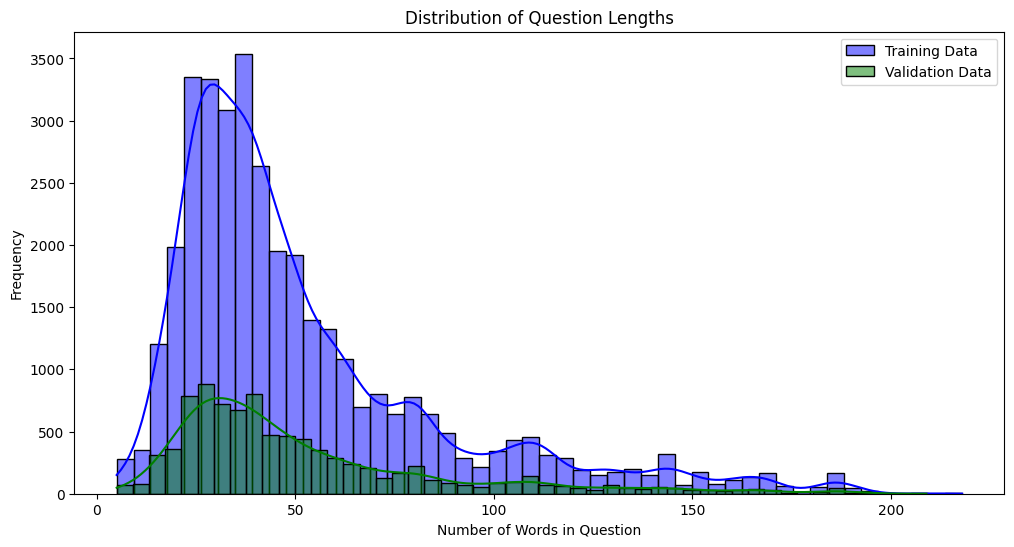

In [23]:
# Calculate the length of questions based on the 'question' column
train_data['question_length'] = train_data['question'].apply(len)
val_data['question_length'] = val_data['question'].apply(len)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_data['question_length'], bins=50, kde=True, color='blue', label='Training Data')
sns.histplot(val_data['question_length'], bins=50, kde=True, color='green', label='Validation Data')
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Words in Question')
plt.ylabel('Frequency')
plt.legend()
plt.show()

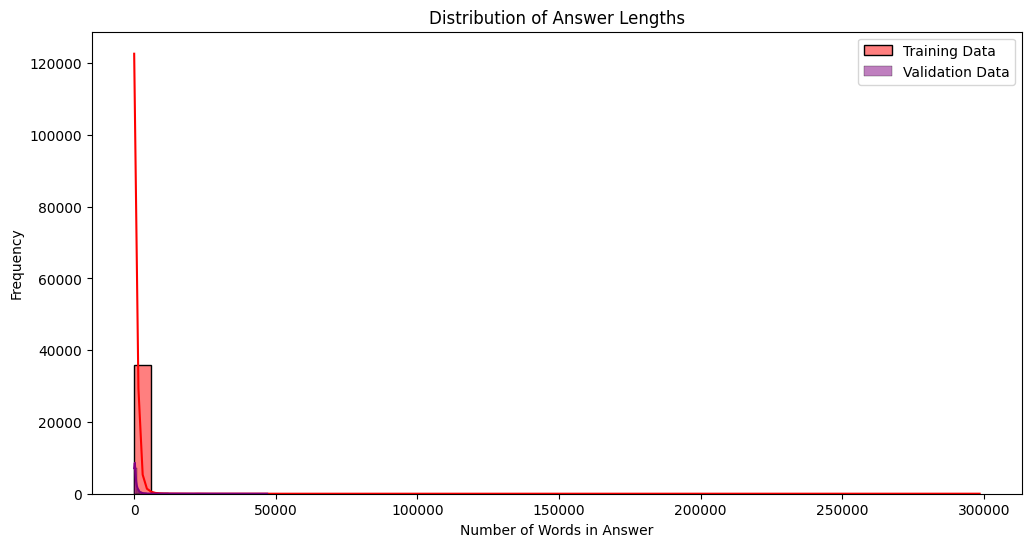

In [28]:
# Calculate the length of answers based on 'answer' column
train_data['answer_length'] = train_data['answer'].apply(len)
val_data['answer_length'] = val_data['answer'].apply(len)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_data['answer_length'], bins=50, kde=True, color='red', label='Training Data')
sns.histplot(val_data['answer_length'], bins=50, kde=True, color='purple', label='Validation Data')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Words in Answer')
plt.ylabel('Frequency')
plt.legend()
plt.show()
